# Aufgabe

### von Lalenia-Katerina Zourni

## Aufgabebeschreibung


Der folgende Datensatz https://github.com/hypoport/ep-dna-bewerberaufgabe besteht aus öffentlich verfügbaren Informationen über Kreditanfragen in New York. Die Daten beziehen sich auf Anfragen und Aussagen darüber, ob der Kredit gewährt wurde. Ziel Das Ziel ist es, interessante Informationen aus den Daten zu extrahieren. In diesem Projekt versuche ich, in der vorgegebenen Zeit von 4 Stunden folgendes zu erreichen:

* Zunächst werde ich die Merkmale der Kreditnehmer untersuchen, um festzustellen, ob es ein Muster gibt, das auf dem Profil des Kreditnehmers (Einkommen, Rasse, Pfandrechtstatus usw.) und den Gründen für die Gewährung oder Ablehnung eines Kredits beruht, sowie den Gründen, aus denen die Leute um einen Kredit bitten. Einige der oben genannten Informationen werden auch Aufschluss darüber geben, welche Kreditnehmer von den Kreditgebern bevorzugt werden,

* Anschließend werden die Merkmale der Institutionen untersucht, z. B. welche Institutionen die größeren Kredite vergeben und wie viele Einheiten sie in ihrem Besitz haben. Ich werde versuchen festzustellen, obn es einn Muster gibt,, das auf dem Profil des Kreditgebers beruht.

* Dann die Raumordnung und die soziale Raumordnung: Gebiet, Bevölkerung, Minderheitspolemik, Zugänge usw.


 Diese Merkmale werden hauptsächlich anhand des Merkmals(feature) "action_taken" getestet. Denn die Frage, die diese Analyse beantworten will, ist, warum Kreditnehmern ein Kredit gewährt oder verweigert wird.

 Wenn genügend Zeit vorhanden ist, werde ich eine einfache logistische Regression Model erstellen.
 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as st

import pickle

#### Prüfen(inspecting) und Verarbeiten(wrangling) der Daten

In [ ]:
pd.set_option('display.max_colwidth', None)
description = pd.read_csv("description.csv", on_bad_lines='skip')
description['action_taken_name;The action taken on the loan or application']

In [4]:
data = pd.read_csv('sample.csv')
data.head()

,action_taken_name,agency_name,applicant_ethnicity_name,applicant_race_name_1,applicant_sex_name,applicant_income_000s,co_applicant_ethnicity_name,co_applicant_race_name_1,co_applicant_sex_name,county_name,...,owner_occupancy_name,preapproval_name,property_type_name,purchaser_type_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population
0,Application denied by financial institution,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Female,176.0,No co-applicant,No co-applicant,No co-applicant,Chautauqua County,...,Not owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60000.0,235,2605.0,930.0,6.850000,2979.0
1,Application withdrawn by applicant,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,53.0,No co-applicant,No co-applicant,No co-applicant,Erie County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,69000.0,108,2053.0,821.0,33.580002,4416.0
2,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Male,223.0,Not Hispanic or Latino,White,Female,Queens County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71300.0,659,497.0,387.0,49.959999,1363.0
3,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,Asian,Female,43.0,No co-applicant,No co-applicant,No co-applicant,Queens County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71300.0,103,251.0,558.0,32.090000,1960.0
4,Loan originated,National Credit Union Administration,Not Hispanic or Latino,White,Male,72.0,No co-applicant,No co-applicant,No co-applicant,Steuben County,...,Owner-occupied as a principal dwelling,Preapproval was requested,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60000.0,45,1514.0,1003.0,2.120000,3391.0


In [5]:
data.columns

Index(['action_taken_name', 'agency_name', 'applicant_ethnicity_name',
       'applicant_race_name_1', 'applicant_sex_name', 'applicant_income_000s',
       'co_applicant_ethnicity_name', 'co_applicant_race_name_1',
       'co_applicant_sex_name', 'county_name', 'denial_reason_name_1',
       'denial_reason_name_2', 'denial_reason_name_3', 'hoepa_status_name',
       'lien_status_name', 'loan_purpose_name', 'loan_type_name', 'msamd_name',
       'owner_occupancy_name', 'preapproval_name', 'property_type_name',
       'purchaser_type_name', 'hud_median_family_income', 'loan_amount_000s',
       'number_of_1_to_4_family_units', 'number_of_owner_occupied_units',
       'minority_population', 'population'],
      dtype='object')

In [6]:
data.dtypes

action_taken_name                  object
agency_name                        object
applicant_ethnicity_name           object
applicant_race_name_1              object
applicant_sex_name                 object
applicant_income_000s             float64
co_applicant_ethnicity_name        object
co_applicant_race_name_1           object
co_applicant_sex_name              object
county_name                        object
denial_reason_name_1               object
denial_reason_name_2               object
denial_reason_name_3               object
hoepa_status_name                  object
lien_status_name                   object
loan_purpose_name                  object
loan_type_name                     object
msamd_name                         object
owner_occupancy_name               object
preapproval_name                   object
property_type_name                 object
purchaser_type_name                object
hud_median_family_income          float64
loan_amount_000s                  

In [7]:
data.describe()

,applicant_income_000s,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population
count,151344.000000,175178.000000,175862.000000,174951.000000,175020.000000,175166.000000,175166.000000
mean,140.596780,78158.378335,333.287771,1514.470783,1214.276243,29.182163,4749.017338
std,273.130096,16202.442285,1159.473567,792.348709,609.515566,29.027924,1878.994617
min,1.000000,57200.000000,1.000000,6.000000,3.000000,0.340000,1.000000
25%,58.000000,69000.000000,102.000000,967.000000,748.000000,7.760000,3444.000000
50%,90.000000,71300.000000,208.000000,1525.000000,1197.000000,17.200001,4554.000000
75%,141.000000,82700.000000,366.000000,2011.000000,1640.000000,39.320000,5892.000000
max,9999.000000,109000.000000,99999.000000,6345.000000,6454.000000,100.000000,26588.000000


#### Bemerkungen

Aus der deskriptiven Statistik geht hervor, dass die Kreditnehmer ein höheres mittleres Einkommen haben als das nationale Median-Familieneinkommen. Sicherlich kann das an extremen Ausreißern bei den Daten liegen. Wir können in diesem Punkt verstehen, wenn die Kreditnehmer mit kleinerem Mittelwert große Kredite beantragen. Das kann bedeuten, dass extreme Preise den Mittelwert verändern. Das ist der Grund dafür, dass wir bei der Ermittlung der Interquantilspanne nachprüfen werden. Anhand der Minimal- und Maximalwerte sowie der Standardabweichung speziell bei den Einkommen der Antragsteller können wir sehen, dass es dort extreme Ausreißer(outliers) gibt. Das erste hilft uns zu verstehen, ob Banken und Institutionen das Einkommen bei der Entscheidung berücksichtigen - was ich stark bejahe - und das zweite hilft uns, das Profil der Banken zu verstehen. Wo und warum Banken Kredite vergeben. Auch wenn die Ausreißer behandelt werden müssen, werde ich sie vorerst beibehalten, weil sie mir einen Einblick in die Daten geben.

#### Drop values

Nach sorgfältiger Prüfung der Merkmale beschließe ich, einige von ihnen fallen zu lassen. Die Merkmale für Mitantragsteller haben zu viele fehlende Werte, ebenso wie die Merkmale, die sich auf Ablehnungsgründe beziehen.

In [10]:
data.drop(labels=['denial_reason_name_1',
       'denial_reason_name_2', 'denial_reason_name_3','hoepa_status_name','preapproval_name','msamd_name', 'co_applicant_ethnicity_name', 'co_applicant_race_name_1',
       'co_applicant_sex_name'], axis=1, inplace = True)

In [11]:
data.drop(data[(data.action_taken_name == "Application withdrawn by applicant") | (data.action_taken_name == "File closed for incompleteness") | (data.action_taken_name == "Application approved but not accepted")].index)

,action_taken_name,agency_name,applicant_ethnicity_name,applicant_race_name_1,applicant_sex_name,applicant_income_000s,county_name,lien_status_name,loan_purpose_name,loan_type_name,owner_occupancy_name,property_type_name,purchaser_type_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population
0,Application denied by financial institution,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Female,176.0,Chautauqua County,Secured by a first lien,Refinancing,Conventional,Not owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60000.0,235,2605.0,930.0,6.850000,2979.0
2,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Male,223.0,Queens County,Secured by a first lien,Home purchase,Conventional,Owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71300.0,659,497.0,387.0,49.959999,1363.0
3,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,Asian,Female,43.0,Queens County,Secured by a first lien,Home purchase,Conventional,Owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71300.0,103,251.0,558.0,32.090000,1960.0
4,Loan originated,National Credit Union Administration,Not Hispanic or Latino,White,Male,72.0,Steuben County,Secured by a first lien,Home purchase,Conventional,Owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60000.0,45,1514.0,1003.0,2.120000,3391.0
5,Loan purchased by the institution,Consumer Financial Protection Bureau,Not applicable,Not applicable,Not applicable,NaN,New York County,Not applicable,Refinancing,Conventional,Not applicable,Multifamily dwelling,Loan was not originated or was not sold in cal...,71300.0,1650,NaN,686.0,37.490002,6370.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175857,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Female,118.0,Nassau County,Secured by a first lien,Home purchase,Conventional,Owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,Affiliate institution,109000.0,300,1470.0,1337.0,17.110001,4448.0
175858,Loan originated,Department of Housing and Urban Development,Not Hispanic or Latino,White,Female,27.0,Monroe County,Secured by a first lien,Home purchase,FHA-insured,Owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,"Life insurance company, credit union, mortgage...",69700.0,88,1719.0,1490.0,16.040001,4658.0
175859,Loan originated,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,215.0,Nassau County,Secured by a first lien,Home purchase,Conventional,Owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,Fannie Mae (FNMA),109000.0,205,1547.0,1455.0,7.730000,4671.0
175860,Loan originated,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,116.0,Rockland County,Secured by a first lien,Refinancing,Conventional,Owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,Freddie Mac (FHLMC),71300.0,200,1743.0,1534.0,19.969999,5484.0


In [12]:
data.reset_index(drop=True)

,action_taken_name,agency_name,applicant_ethnicity_name,applicant_race_name_1,applicant_sex_name,applicant_income_000s,county_name,lien_status_name,loan_purpose_name,loan_type_name,owner_occupancy_name,property_type_name,purchaser_type_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population
0,Application denied by financial institution,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Female,176.0,Chautauqua County,Secured by a first lien,Refinancing,Conventional,Not owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60000.0,235,2605.0,930.0,6.850000,2979.0
1,Application withdrawn by applicant,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,53.0,Erie County,Secured by a first lien,Home purchase,FHA-insured,Owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,69000.0,108,2053.0,821.0,33.580002,4416.0
2,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Male,223.0,Queens County,Secured by a first lien,Home purchase,Conventional,Owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71300.0,659,497.0,387.0,49.959999,1363.0
3,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,Asian,Female,43.0,Queens County,Secured by a first lien,Home purchase,Conventional,Owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71300.0,103,251.0,558.0,32.090000,1960.0
4,Loan originated,National Credit Union Administration,Not Hispanic or Latino,White,Male,72.0,Steuben County,Secured by a first lien,Home purchase,Conventional,Owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60000.0,45,1514.0,1003.0,2.120000,3391.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175857,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Female,118.0,Nassau County,Secured by a first lien,Home purchase,Conventional,Owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,Affiliate institution,109000.0,300,1470.0,1337.0,17.110001,4448.0
175858,Loan originated,Department of Housing and Urban Development,Not Hispanic or Latino,White,Female,27.0,Monroe County,Secured by a first lien,Home purchase,FHA-insured,Owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,"Life insurance company, credit union, mortgage...",69700.0,88,1719.0,1490.0,16.040001,4658.0
175859,Loan originated,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,215.0,Nassau County,Secured by a first lien,Home purchase,Conventional,Owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,Fannie Mae (FNMA),109000.0,205,1547.0,1455.0,7.730000,4671.0
175860,Loan originated,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,116.0,Rockland County,Secured by a first lien,Refinancing,Conventional,Owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,Freddie Mac (FHLMC),71300.0,200,1743.0,1534.0,19.969999,5484.0


#### Spalten und Zeilen umbenennen

In [13]:
data['action_taken_name'] = data['action_taken_name'].str.replace('Application denied by financial institution', 'Denied').str.replace('Loan originated', 'Granted').str.replace('Loan purchased by the institution', 'Granted')

In [14]:
data = data.drop(data[(data.action_taken_name == "Application withdrawn by applicant") | 
                      (data.action_taken_name == "File closed for incompleteness") |
                      (data.action_taken_name == "Application approved but not accepted")|
                      (data.action_taken_name == "Preapproval request denied by financial institution")
                     ].index)

In [15]:
data['action_taken_name'].value_counts()

Granted    115664
Denied      32005
Name: action_taken_name, dtype: int64

#### Ersetzen Sie fehlende Werte durch NaN-Werte

In [16]:
data.isnull().sum()

action_taken_name                     0
agency_name                           0
applicant_ethnicity_name              0
applicant_race_name_1                 0
applicant_sex_name                    0
applicant_income_000s             21477
county_name                         210
lien_status_name                      0
loan_purpose_name                     0
loan_type_name                        0
owner_occupancy_name                  0
property_type_name                    0
purchaser_type_name                   0
hud_median_family_income            350
loan_amount_000s                      0
number_of_1_to_4_family_units       536
number_of_owner_occupied_units      480
minority_population                 361
population                          361
dtype: int64

Die obigen Angaben liefern mir nicht genügend Informationen über die fehlenden Werte, da nicht angegebene Informationen in den Daten als Zeichenfolge übergeben werden, die beschreibt, warum die Informationen fehlten. Nachdem ich die Merkmale sorgfältig untersucht hatte, entdeckte ich, dass zum Beispiel in der Spalte "Rennen", wenn die Informationen nicht angegeben wurden, die Zeichenfolge "Nicht zutreffend" an die Zeile übergeben wurde. Die gleiche Methode für fehlende Informationen trat auch in anderen Spalten auf.


In [17]:
data.replace('Not applicable', np.nan, regex=True) 
data.replace('Information not provided by applicant in mail, Internet, or telephone application', np.nan, regex=True)
#data.head(12)

,action_taken_name,agency_name,applicant_ethnicity_name,applicant_race_name_1,applicant_sex_name,applicant_income_000s,county_name,lien_status_name,loan_purpose_name,loan_type_name,owner_occupancy_name,property_type_name,purchaser_type_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population
0,Denied,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Female,176.0,Chautauqua County,Secured by a first lien,Refinancing,Conventional,Not owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60000.0,235,2605.0,930.0,6.850000,2979.0
2,Granted,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Male,223.0,Queens County,Secured by a first lien,Home purchase,Conventional,Owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71300.0,659,497.0,387.0,49.959999,1363.0
3,Granted,Consumer Financial Protection Bureau,Not Hispanic or Latino,Asian,Female,43.0,Queens County,Secured by a first lien,Home purchase,Conventional,Owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71300.0,103,251.0,558.0,32.090000,1960.0
4,Granted,National Credit Union Administration,Not Hispanic or Latino,White,Male,72.0,Steuben County,Secured by a first lien,Home purchase,Conventional,Owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60000.0,45,1514.0,1003.0,2.120000,3391.0
5,Granted,Consumer Financial Protection Bureau,Not applicable,Not applicable,Not applicable,NaN,New York County,Not applicable,Refinancing,Conventional,Not applicable,Multifamily dwelling,Loan was not originated or was not sold in cal...,71300.0,1650,NaN,686.0,37.490002,6370.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175857,Granted,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Female,118.0,Nassau County,Secured by a first lien,Home purchase,Conventional,Owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,Affiliate institution,109000.0,300,1470.0,1337.0,17.110001,4448.0
175858,Granted,Department of Housing and Urban Development,Not Hispanic or Latino,White,Female,27.0,Monroe County,Secured by a first lien,Home purchase,FHA-insured,Owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,"Life insurance company, credit union, mortgage...",69700.0,88,1719.0,1490.0,16.040001,4658.0
175859,Granted,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,215.0,Nassau County,Secured by a first lien,Home purchase,Conventional,Owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,Fannie Mae (FNMA),109000.0,205,1547.0,1455.0,7.730000,4671.0
175860,Granted,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,116.0,Rockland County,Secured by a first lien,Refinancing,Conventional,Owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,Freddie Mac (FHLMC),71300.0,200,1743.0,1534.0,19.969999,5484.0


In [18]:
data = data.replace('Not applicable', np.nan, regex=True) 
data = data.replace('Information not provided by applicant in mail, Internet, or telephone application', np.nan, regex=True)
#data

In [19]:
data['applicant_ethnicity_name'].value_counts()
data['applicant_race_name_1'].value_counts()
data['applicant_sex_name'].value_counts()

Male      79588
Female    40051
Name: applicant_sex_name, dtype: int64

#### Umgang mit fehlenden Werten

Aufgrund der Beschaffenheit der Merkmale habe ich zunächst beschlossen, die Werte für die Kategorien, die Rasse, Geschlecht und ethnische Zugehörigkeit enthalten, mit dem Wert "Missing" zu füllen. Das würde jedoch die Überprüfung der Daten erschweren. Eine andere Lösung war, die NaN-Werte beizubehalten. Wenn die fehlenden Werte unter 10 % liegen, können sie ignoriert werden. Ich beschloss jedoch, die NaN-Werte zu imputieren. Ein besserer Ansatz für die oben genannten Kategorien wäre die Anwendung von Algorithmen des maschinellen Lernens, die diese vorhersagen können. Aufgrund des engen Zeitrahmens dieses Projekts habe ich mich für einfachere Methoden entschieden, um dies zu tun. Wir können diese Methoden in Betracht ziehen, um die fehlenden Werte zu ergänzen: Für numerische Variablen: Imputation mittels Mittelwert oder Median Für kategorische Variablen: Imputation mittels Modus.

In [20]:
data['applicant_ethnicity_name'].fillna(data['applicant_ethnicity_name'].mode()[0], inplace=True)
data['applicant_race_name_1'].fillna(data['applicant_race_name_1'].mode()[0], inplace=True)
data['applicant_sex_name'].fillna(data['applicant_sex_name'].mode()[0], inplace=True)
data['county_name'].fillna(data['county_name'].mode()[0], inplace=True)
data['lien_status_name'].fillna(data['lien_status_name'].mode()[0], inplace=True)

data['applicant_income_000s'].fillna(data['applicant_income_000s'].median(), inplace=True)
#data
#data.isnull().sum()

#### Spaltennamen zur besseren Lesbarkeit bereinigen

In [21]:
data.columns = [column[:-7] if 'name_1' in column else column[:-5] if 'name' in column else column for column in data.columns]

In [22]:
pickle.dump(data, open('data.pkl', 'wb'))
data_cleaned = pickle.load(open('data.pkl', 'rb'))
data_cleaned.head()

,action_taken,agency,applicant_ethnicity,applicant_race,applicant_sex,applicant_income_000s,county,lien_status,loan_purpose,loan_type,owner_occupancy,property_type,purchaser_type,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population
0,Denied,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Female,176.0,Chautauqua County,Secured by a first lien,Refinancing,Conventional,Not owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60000.0,235,2605.0,930.0,6.850000,2979.0
2,Granted,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Male,223.0,Queens County,Secured by a first lien,Home purchase,Conventional,Owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71300.0,659,497.0,387.0,49.959999,1363.0
3,Granted,Consumer Financial Protection Bureau,Not Hispanic or Latino,Asian,Female,43.0,Queens County,Secured by a first lien,Home purchase,Conventional,Owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71300.0,103,251.0,558.0,32.090000,1960.0
4,Granted,National Credit Union Administration,Not Hispanic or Latino,White,Male,72.0,Steuben County,Secured by a first lien,Home purchase,Conventional,Owner-occupied as a principal dwelling,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60000.0,45,1514.0,1003.0,2.120000,3391.0
5,Granted,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Male,88.0,New York County,Secured by a first lien,Refinancing,Conventional,NaN,Multifamily dwelling,Loan was not originated or was not sold in cal...,71300.0,1650,NaN,686.0,37.490002,6370.0


#### Suche nach Korellationen, bevor ich mit dem Plotten beginne.

In [25]:
data_cleaned.groupby('action_taken')[['applicant_income_000s']].mean().sort_values(by='applicant_income_000s', ascending=False)

,applicant_income_000s
action_taken,
Granted,132.383058
Denied,112.754038


In [26]:
data_crosstab = pd.crosstab(data_cleaned["loan_purpose"], 
                            data_cleaned['action_taken'],
                                margins = False)
print(data_crosstab)

action_taken      Denied  Granted
loan_purpose                     
Home improvement    6763     9955
Home purchase       8914    68279
Refinancing        16328    37430


In [63]:
data_crosstab = pd.crosstab(data_cleaned["agency"], 
                            data_cleaned['action_taken'],
                                margins = False)
print(data_crosstab)

action_taken                                 Denied  Granted
agency                                                      
Consumer Financial Protection Bureau          13564    47244
Department of Housing and Urban Development   11245    37582
Federal Deposit Insurance Corporation           872     4093
Federal Reserve System                          754     2709
National Credit Union Administration           3197    14057
Office of the Comptroller of the Currency      2373     9979


In [27]:
data_crosstab = pd.crosstab(data_cleaned["agency"], 
                            data_cleaned['number_of_1_to_4_family_units'],
                                margins = False)
print(data_crosstab)

number_of_1_to_4_family_units                6.0     8.0     9.0     10.0    \
agency                                                                        
Consumer Financial Protection Bureau             28       6      17      25   
Department of Housing and Urban Development       3       1       3       2   
Federal Deposit Insurance Corporation             0       0       0       2   
Federal Reserve System                            1       0       1       0   
National Credit Union Administration              0       0       1       0   
Office of the Comptroller of the Currency         0       0       2       0   

number_of_1_to_4_family_units                11.0    12.0    13.0    14.0    \
agency                                                                        
Consumer Financial Protection Bureau             64      13      15      37   
Department of Housing and Urban Development       5       4       5       6   
Federal Deposit Insurance Corporation             2

In [28]:
data_crosstab = pd.crosstab(data_cleaned["agency"], 
                            data_cleaned['number_of_1_to_4_family_units'],
                                margins = False)
print(data_crosstab)

number_of_1_to_4_family_units                6.0     8.0     9.0     10.0    \
agency                                                                        
Consumer Financial Protection Bureau             28       6      17      25   
Department of Housing and Urban Development       3       1       3       2   
Federal Deposit Insurance Corporation             0       0       0       2   
Federal Reserve System                            1       0       1       0   
National Credit Union Administration              0       0       1       0   
Office of the Comptroller of the Currency         0       0       2       0   

number_of_1_to_4_family_units                11.0    12.0    13.0    14.0    \
agency                                                                        
Consumer Financial Protection Bureau             64      13      15      37   
Department of Housing and Urban Development       5       4       5       6   
Federal Deposit Insurance Corporation             2

In [29]:
#Welche Agenturen gaben das meiste Geld
loan_amount_per_agency = data_cleaned.groupby('agency').loan_amount_000s.count().reset_index()
loan_amount_per_agency

,agency,loan_amount_000s
0,Consumer Financial Protection Bureau,60808
1,Department of Housing and Urban Development,48827
2,Federal Deposit Insurance Corporation,4965
3,Federal Reserve System,3463
4,National Credit Union Administration,17254
5,Office of the Comptroller of the Currency,12352


#### Bemerkungen

Das Consumer Financial Protection Bureau und das Wohnungsbauministerium liegen auf den ersten beiden Plätzen. Aus früheren Beobachtungen geht eindeutig hervor, dass sie über ein größeres Kapital verfügen und die besten Institutionen sind.
In einem weiteren Schritt werden wir versuchen zu untersuchen, wo und nach welchen Kriterien diese beiden Institutionen Kredite gewähren oder verweigern.

## Univariate Analyse

#### Visualisierung den numerischen Variablen. Hier betrachten wir die Verteilung der "Antragsteller_Einkommen_000" und dann die der "Kreditbeträge_000", um Ausreißer zu finden.

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


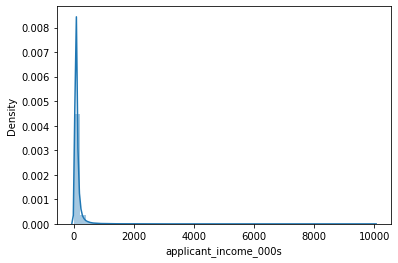

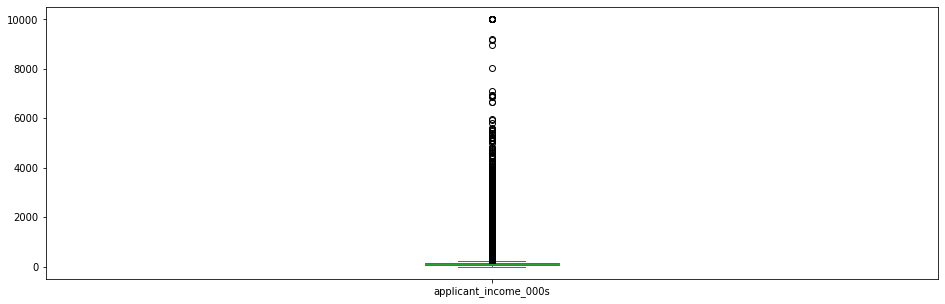

In [30]:
sns.distplot(data_cleaned['applicant_income_000s'])
plt.show()
data_cleaned['applicant_income_000s'].plot.box(figsize=(16,5))
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


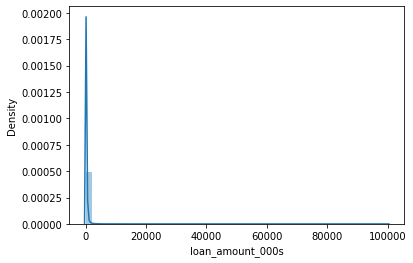

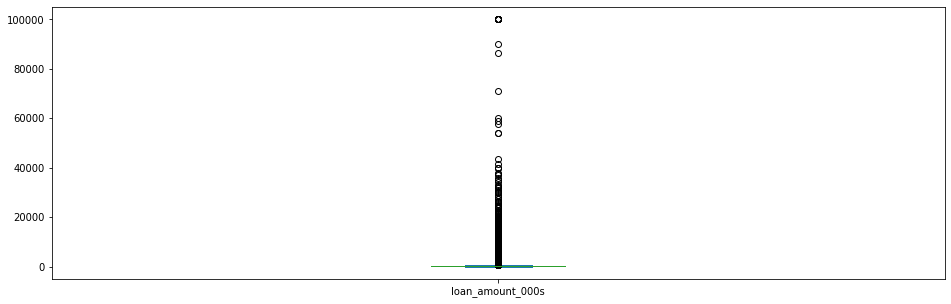

In [32]:
sns.distplot(data_cleaned['loan_amount_000s'])
plt.show()
data_cleaned['loan_amount_000s'].plot.box(figsize=(16,5))
plt.show()

Daraus lässt sich ableiten, dass die meisten Daten in der Verteilung des Bewerbereinkommens nach links gerichtet sind, was bedeutet, dass sie nicht normal verteilt sind.
Der Boxplot bestätigt das Vorhandensein einer Vielzahl von Ausreißern/Extremwerten.

#### Betrachten wir nun die kategorialen Merkmale

<AxesSubplot:>

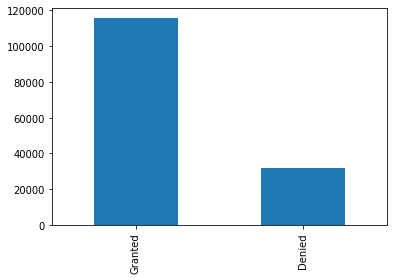

In [34]:
data_cleaned['action_taken'].value_counts(normalize=True) 
data_cleaned['action_taken'].value_counts().plot.bar()

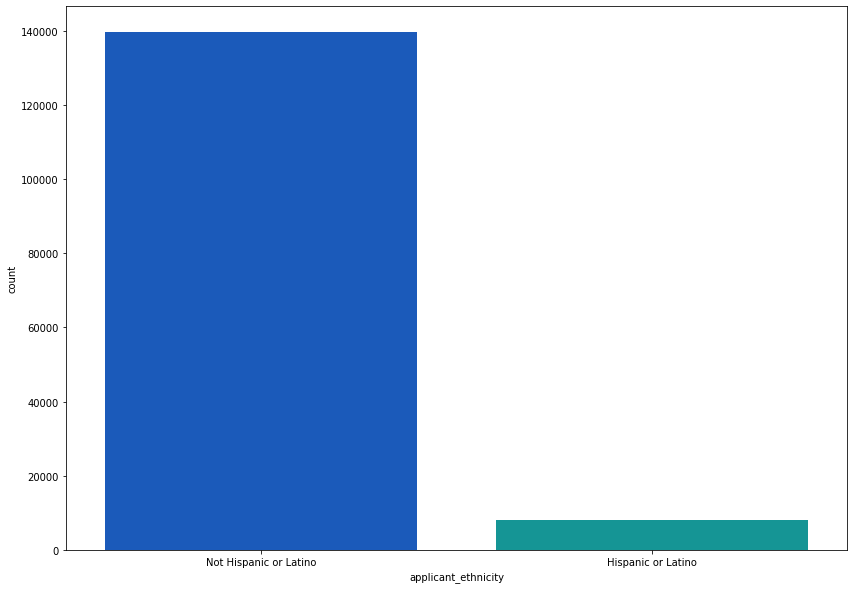

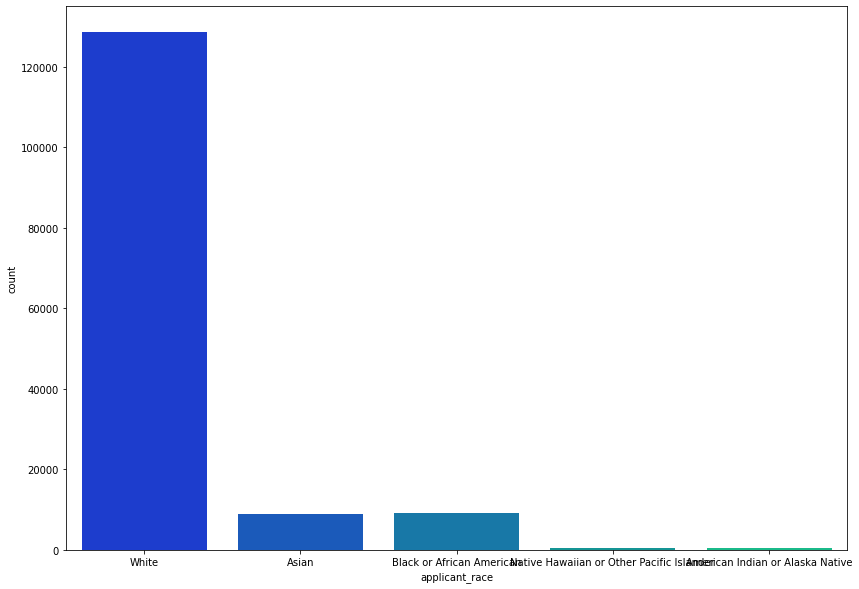

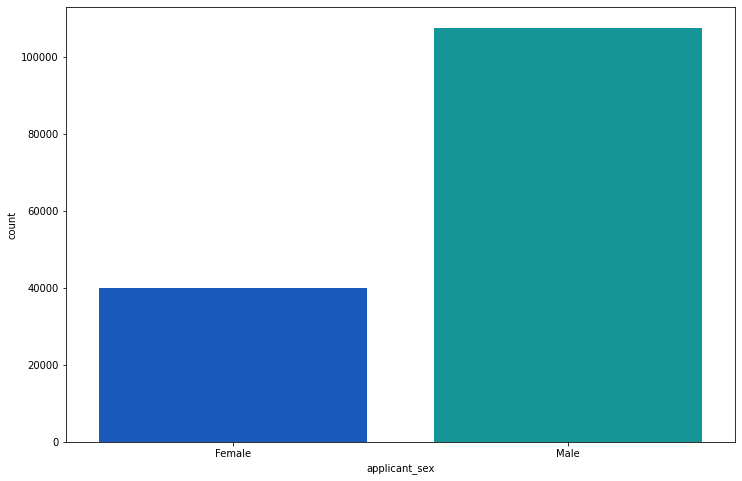

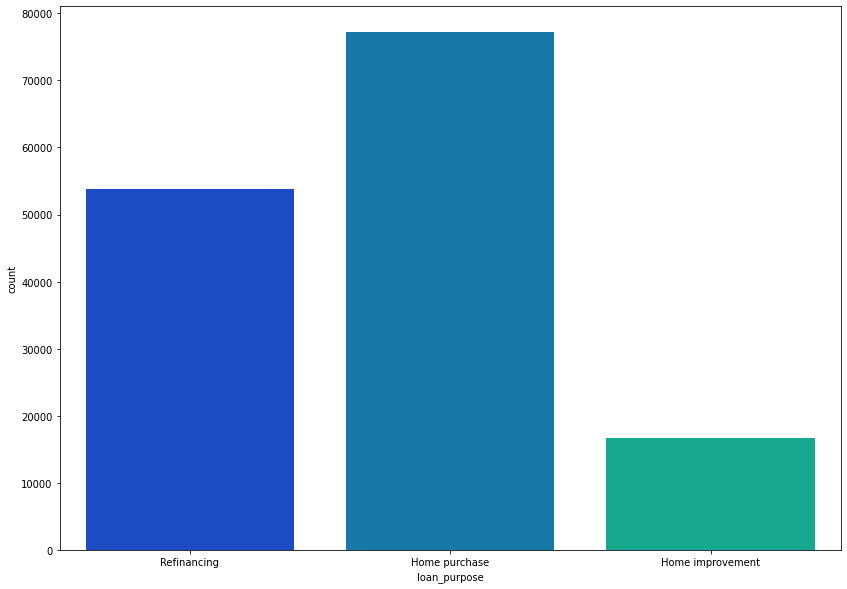

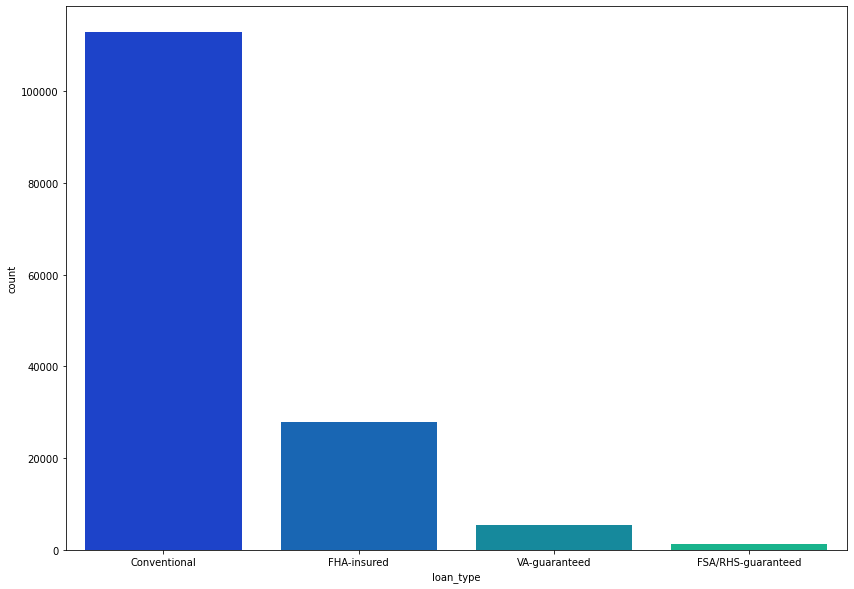

In [35]:
fig, ax = plt.subplots(figsize=(14,10))
sns.countplot(x='applicant_ethnicity', data=data_cleaned, palette='winter')
plt.show()
fig, ax = plt.subplots(figsize=(14,10))
sns.countplot(x='applicant_race', data=data_cleaned, palette='winter')
plt.show()
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x='applicant_sex', data=data_cleaned, palette='winter')
plt.show()
fig, ax = plt.subplots(figsize=(14,10))
sns.countplot(x='loan_purpose', data=data_cleaned, palette='winter')
plt.show()
fig, ax = plt.subplots(figsize=(14,10))
sns.countplot(x='loan_type', data=data_cleaned, palette='winter')
plt.show()

#### Bemerkungen

Aus den obigen bar plots lassen sich die folgenden Schlüsse ziehen: Die meisten Antragsteller sind nicht hispanisch oder lateinamerikanisch, die meisten von ihnen sind weiß und männlich. Sie beantragen Darlehen hauptsächlich für den Erwerb von Wohneigentum. In einer weiteren multivariaten Analyse können wir versuchen, Muster dafür zu finden, ob die Personen, denen diese Darlehen gewährt werden, sie von Institutionen mit spezifischen Merkmalen erhalten, wie z. B.: Sie beantragen Einheiten in welchen Bezirken, sind sie Familieneinheiten, sind nicht-weiße Antragsteller, denen Darlehen gewährt werden, für Bezirke mit hoher Minderheitenbevölkerung usw. Schließlich sind die meisten Kreditarten konventionell.

Eine Darstellung mit Bezirken(counties) war wegen zu vieler x-Werte nicht möglich. Ein weiterer Schritt kann hier sein, herauszufinden, welches Gebiet zu welchem Teil der Stadt gehört, um sie in Kategorien einzuteilen, z. B. West, Ost usw., und ein Pi-Diagramm zu erstellen.

#### Weitere statistische Analysen mit Diagrammen zur näheren Untersuchung von Mittelwert, und Median einiger Merkmale

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


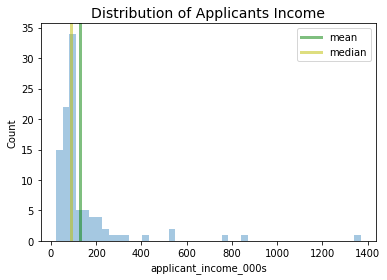

In [37]:
sns.distplot(data_cleaned["applicant_income_000s"][100:200], kde=False)
plt.axvline(x=data_cleaned.applicant_income_000s.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=data_cleaned.applicant_income_000s.median(), linewidth=3, color='y', label="median", alpha=0.5)

plt.xlabel("applicant_income_000s")
plt.ylabel("Count")
plt.title("Distribution of Applicants Income", size=14)
plt.legend(["mean", "median"])

### Bivariate Analyse

<AxesSubplot:xlabel='property_type', ylabel='count'>

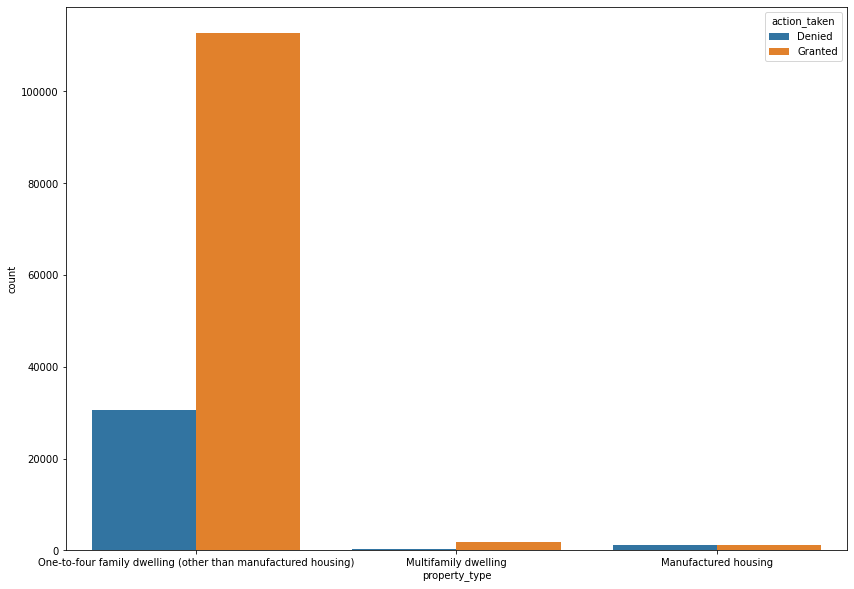

In [68]:
fig, ax = plt.subplots(figsize=(14,10))
sns.countplot(x = 'property_type', hue = 'action_taken', data=data_cleaned)

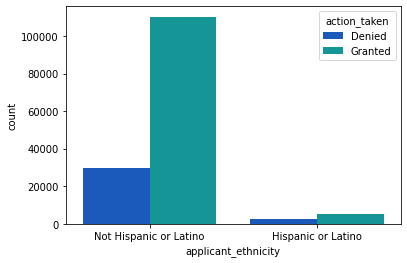

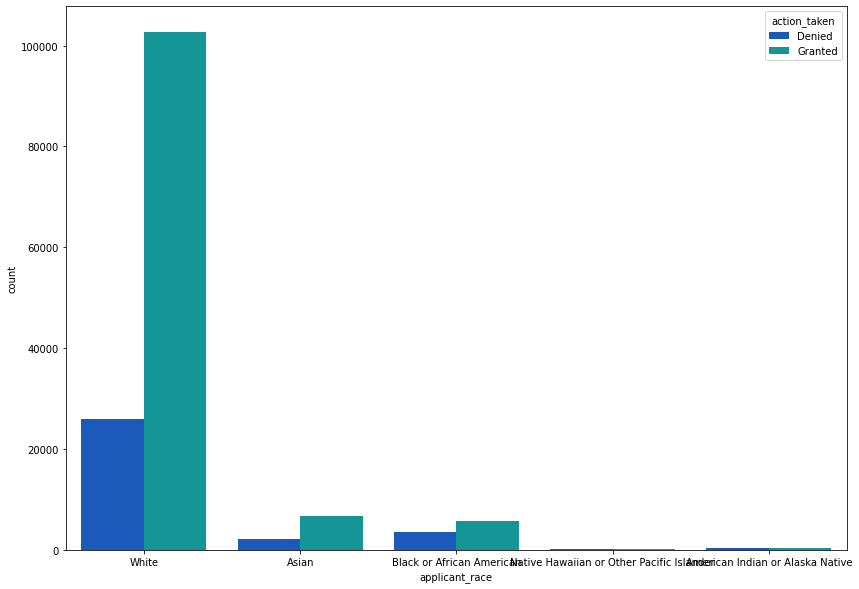

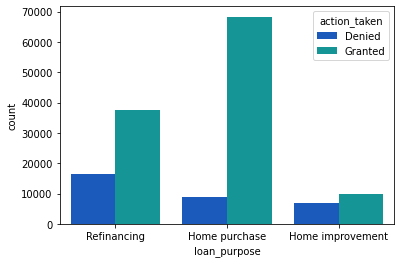

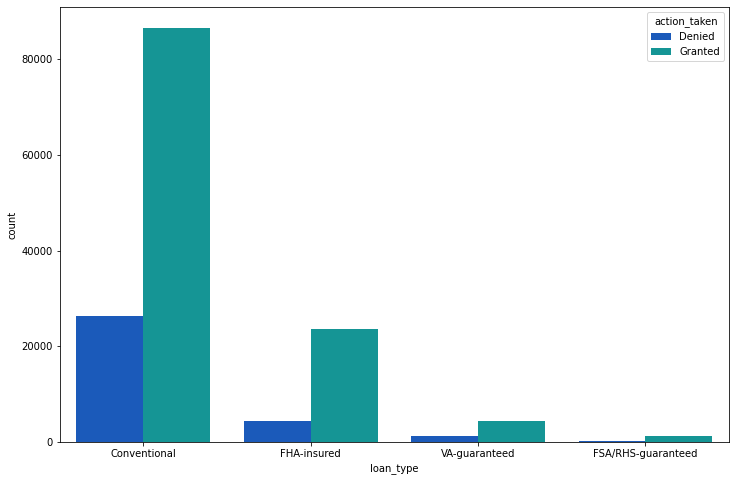

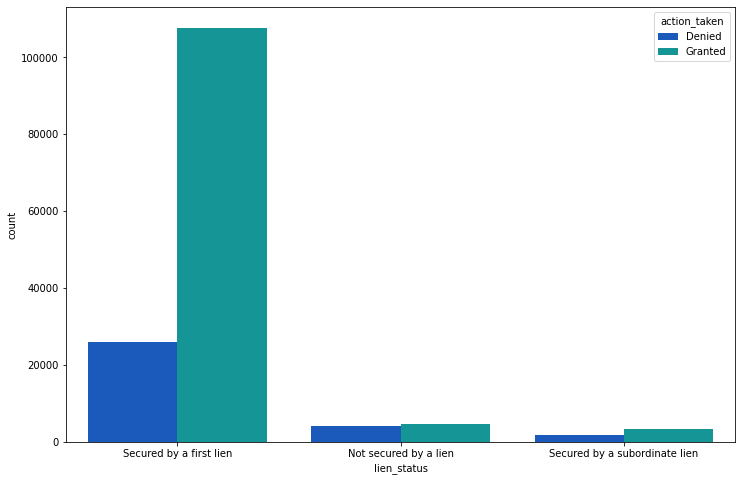

In [65]:
sns.countplot(x='applicant_ethnicity', data=data_cleaned, hue = 'action_taken', palette='winter')
plt.show()
fig, ax = plt.subplots(figsize=(14,10))
sns.countplot(x='applicant_race', data=data_cleaned, hue = 'action_taken', palette='winter')
plt.show()
sns.countplot(x='loan_purpose', data=data_cleaned, hue = 'action_taken', palette='winter')
plt.show()
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x='loan_type', data=data_cleaned, hue = 'action_taken', palette='winter')
plt.show()
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x='lien_status', data=data_cleaned, hue = 'action_taken', palette='winter')
plt.show()

### Bemerkungen

Aus den obigen bar plots lassen sich die folgenden Schlüsse ziehen: 
 Die meisten Kreditnehmer, denen ein Kredit gewährt wurde, waren nicht hispanisch oder lateinamerikanisch und weiß.
 Die meisten der gewährten Kredite waren für Wohnzwecke, konventionell und durch das erste Pfandrecht gesichert. Schließlich wurden die meisten Darlehen für "Ein- bis Vierfamilienhäuser" vergeben.

### Multivariate Analysis

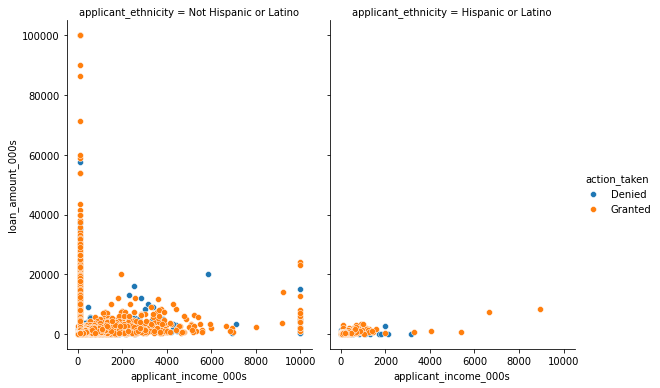

In [59]:
fig = sns.FacetGrid(data_cleaned, col="applicant_ethnicity", hue="action_taken", aspect=.75, height=5.5)
fig.map_dataframe(sns.scatterplot, x='applicant_income_000s', y="loan_amount_000s")
fig.set_axis_labels("applicant_income_000s", "loan_amount_000s")
fig.add_legend()

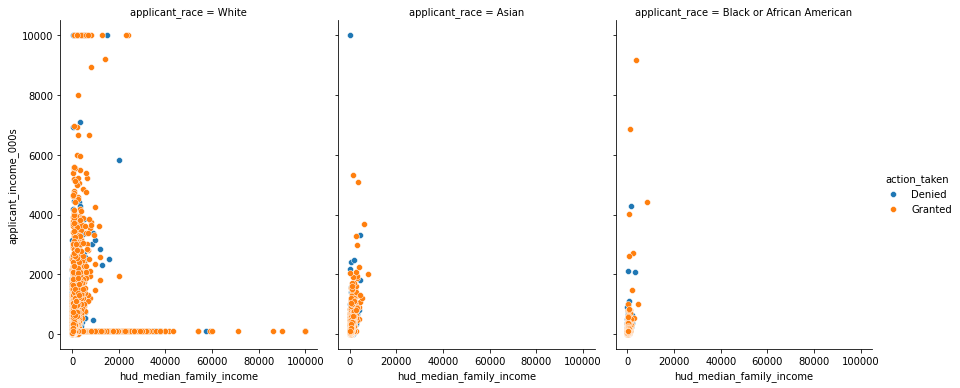

In [60]:
data_race = data_cleaned[(data_cleaned.applicant_race == "White") | 
                      (data_cleaned.applicant_race == "Asian") |
                      (data_cleaned.applicant_race == "Black or African American")]

fig = sns.FacetGrid(data_race, col="applicant_race", hue="action_taken", aspect=.75, height=5.5)
fig.map_dataframe(sns.scatterplot, x='loan_amount_000s', y="applicant_income_000s")
fig.set_axis_labels("hud_median_family_income", "applicant_income_000s")
fig.add_legend()

### Korellationen

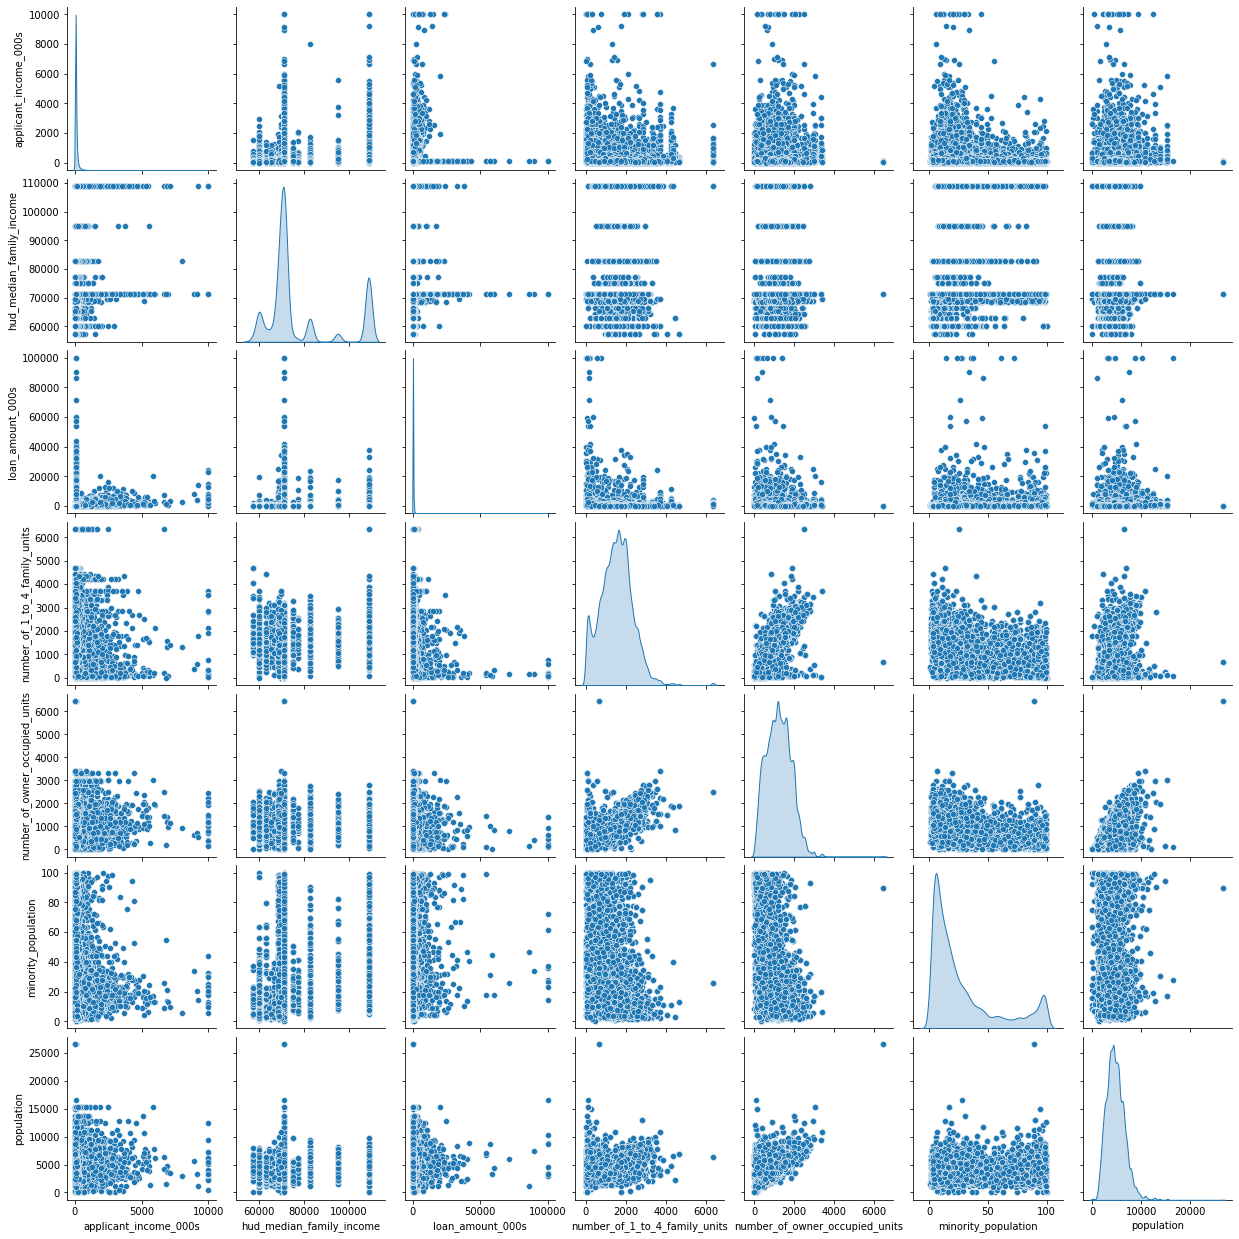

In [61]:

sel=data_cleaned[[ 'applicant_income_000s','hud_median_family_income', 'loan_amount_000s', 'number_of_1_to_4_family_units','number_of_owner_occupied_units', 'minority_population', 'population']]

sns.pairplot(sel, diag_kind='kde')
plt.show()

<AxesSubplot:>

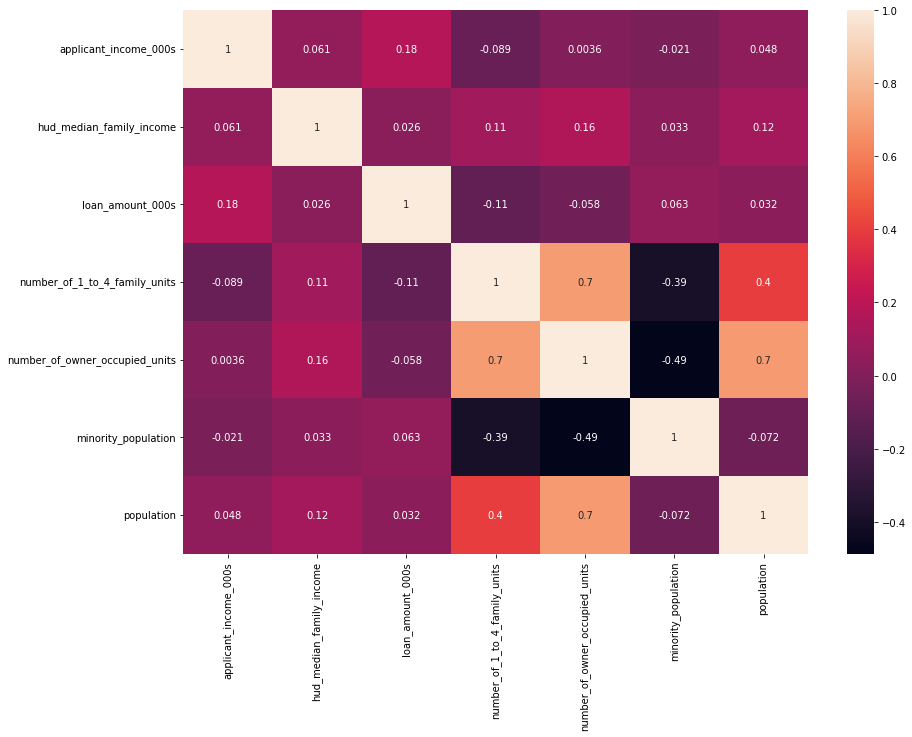

In [62]:
fig, ax = plt.subplots(figsize=(14,10))

sns.heatmap(data_cleaned.corr(),annot=True)

#### Bemerkungen

Aus den obigen Angaben erkenne ich eine Korrelation zwischen der "Anzahl der von Eigentümern bewohnten Einheiten" und der "Bevölkerung" sowie zwischen der "Anzahl der von Eigentümern bewohnten Einheiten" und der "Anzahl der Einheiten für 1 bis 4 Familien". Beides gibt mir einen guten Einblick, um zu verstehen, wo und warum Banken und Institutionen ihre Einheiten haben und wie groß sie sind. Vor allem kann ich hier eine starke Korrelation zwischen dem Einkommen des Antragstellers und dem gewährten Kreditbetrag feststellen.

#### Aus Zeitgründen konnten nicht alle Fragen beantwortet werden, und es gibt noch viele weitere Erkenntnisse zu gewinnen.

### Weitere Schritte:

* Umgang mit Ausreißern
* Fehlende Werte
* Eingehendere Analyse der Daten, um Erkenntnisse und Muster zu finden.
* Bildung von Gruppen von Ausleihern durch Anwendung von Clustermethoden.
* Feature-Engineering und Feature-Auswahl.
* Erstellung eines logistischen Regressionsmodells.